In [3]:
%load_ext autoreload
%autoreload 2

In [4]:
import cv2 as cv
from utils.io_utils import get_images, output_calib_results, draw_detections
from utils.calib_utils import detect_keypoints, get_calib_input


Bad key "text.kerning_factor" on line 4 in
/home/gonzalo/.local/lib/python3.6/site-packages/matplotlib/mpl-data/stylelib/_classic_test_patch.mplstyle.
You probably need to get an updated matplotlibrc file from
http://github.com/matplotlib/matplotlib/blob/master/matplotlibrc.template
or from the matplotlib source distribution


In [7]:
pattern_size = (8, 6)
edge_length = 0.055
data_path = "/home/gonzalo/mnt/bandeja-sequence/2021_02_17/2021-02-17-15_samsung_intrinsics_IMAGES_ONLY/smartphone_video_frames"

In [55]:
images = get_images(data_path, period=10)

In [56]:
import numpy as np
import matplotlib.pyplot as plt
len(images)

175

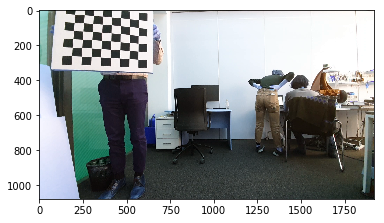

In [73]:
i=0
for key in images.keys():
    i=i+1
    if i==10:
        plt.imshow(images[key])

In [57]:
results = detect_keypoints(images, pattern_size, edge_length)

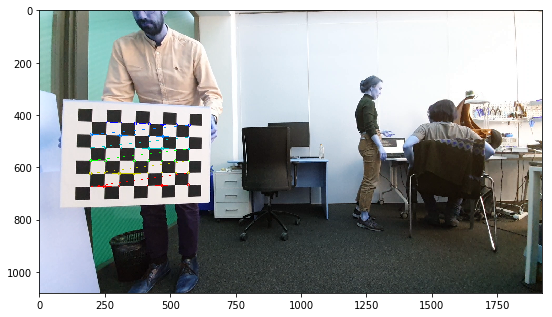

In [61]:
draw_detections(images, results, pattern_size, 20, normalize=True)

In [62]:
criteria = (cv.TERM_CRITERIA_EPS + cv.TERM_CRITERIA_MAX_ITER, 30, 0.0001)

scene_points, loc_kp = get_calib_input(results)

shape = images[list(images.keys())[0]].shape[::-1][1:]

# Note: K3 dist. coeff. is set to zero, because ros requires 4 distortion parameters. Change if needed.
reproj_error, intrinsics, dist_coeff, _, _ = cv.calibrateCamera(scene_points, loc_kp, shape, None, None, flags=cv.CALIB_FIX_K3, criteria=criteria)

print(reproj_error)

0.22667635028129338


Intrinsics:
[[760.18287332   0.         964.72016236]
 [  0.         763.86162832 549.91277011]
 [  0.           0.           1.        ]]
Distortion coefficients:
[[-0.06298466  0.15540413  0.00111871 -0.00070079  0.        ]]
Undistored intrinsics: 
[[890.49127197   0.         959.62396931]
 [  0.         768.30633545 549.75867165]
 [  0.           0.           1.        ]]
Saved calibration results as calib_output/s10_intrinsics.npy


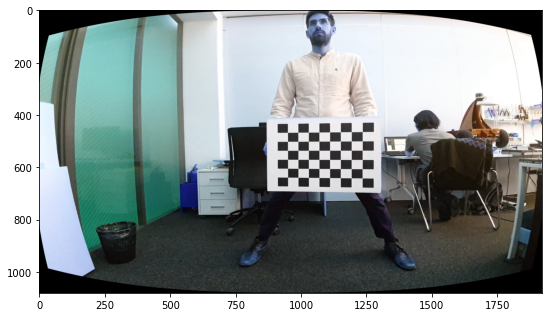

In [14]:
calib_name = 's10'
output_calib_results(intrinsics, dist_coeff, shape, images, 0, calib_name)

Intrinsics:
[[727.93162815   0.         964.50039906]
 [  0.         731.18518186 551.53912623]
 [  0.           0.           1.        ]]
Distortion coefficients:
[[ 0.00237778 -0.01595568  0.00023181 -0.00137306  0.        ]]
Undistored intrinsics: 
[[618.53674316   0.         951.58637947]
 [  0.         621.05401611 557.46108028]
 [  0.           0.           1.        ]]
Saved calibration results as calib_output/s102_intrinsics.npy


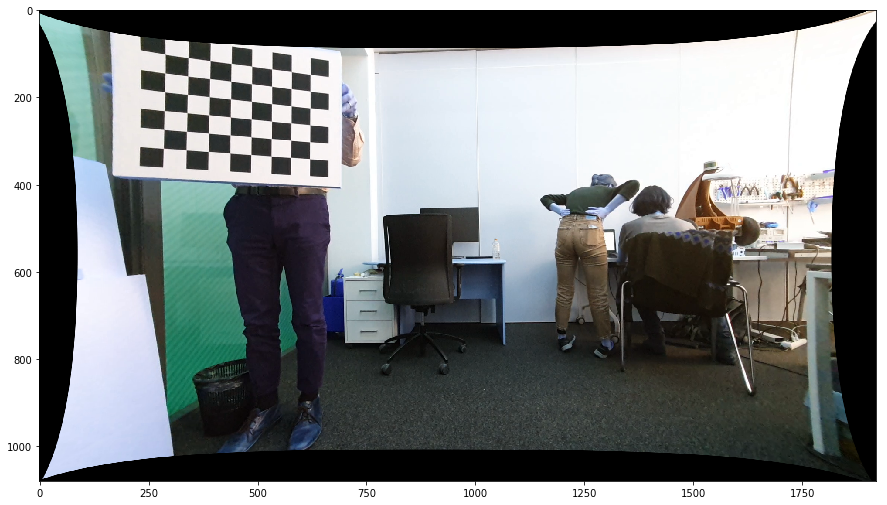

In [72]:
calib_name = 's102'
output_calib_results(intrinsics, dist_coeff, shape, images, 10, calib_name)